In [1]:
pip install torchattacks

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

# Define transformations
transform = transforms.Compose([
    transforms.Resize(224),  # Resize the images to 224x224 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Load pre-trained VGG11 model
model = models.vgg11(pretrained=True)

# Freeze the parameters of the early layers
for param in model.features.parameters():
    param.requires_grad = False

# Modify the final layer to match the number of classes in CIFAR-10 (10 classes)
model.classifier[6] = nn.Linear(4096, 10)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Only parameters of the classifier are being updated
params_to_update = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

# Determine if GPU is available and move the model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [20]:
# Check which parameters are frozen
for name, param in model.named_parameters():
    if not param.requires_grad:
        print(f'{name} is frozen')
    else:
        print(f'{name} is trainable')

features.0.weight is frozen
features.0.bias is frozen
features.3.weight is frozen
features.3.bias is frozen
features.6.weight is frozen
features.6.bias is frozen
features.8.weight is frozen
features.8.bias is frozen
features.11.weight is frozen
features.11.bias is frozen
features.13.weight is frozen
features.13.bias is frozen
features.16.weight is frozen
features.16.bias is frozen
features.18.weight is frozen
features.18.bias is frozen
classifier.0.weight is trainable
classifier.0.bias is trainable
classifier.3.weight is trainable
classifier.3.bias is trainable
classifier.6.weight is trainable
classifier.6.bias is trainable


In [21]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'{name} - requires_grad: True')
        if param.grad is None:
            print(f'{name} does not have gradients')
        else:
            print(f'{name} has gradients')
    else:
        print(f'{name} - requires_grad: False')

features.0.weight - requires_grad: False
features.0.bias - requires_grad: False
features.3.weight - requires_grad: False
features.3.bias - requires_grad: False
features.6.weight - requires_grad: False
features.6.bias - requires_grad: False
features.8.weight - requires_grad: False
features.8.bias - requires_grad: False
features.11.weight - requires_grad: False
features.11.bias - requires_grad: False
features.13.weight - requires_grad: False
features.13.bias - requires_grad: False
features.16.weight - requires_grad: False
features.16.bias - requires_grad: False
features.18.weight - requires_grad: False
features.18.bias - requires_grad: False
classifier.0.weight - requires_grad: True
classifier.0.weight does not have gradients
classifier.0.bias - requires_grad: True
classifier.0.bias does not have gradients
classifier.3.weight - requires_grad: True
classifier.3.weight does not have gradients
classifier.3.bias - requires_grad: True
classifier.3.bias does not have gradients
classifier.6.wei

In [22]:
for name, param in model.named_parameters():
    if param.grad is not None:
        print(f'{name} has gradients')
    else:
        print(f'{name} does not have gradients')

features.0.weight does not have gradients
features.0.bias does not have gradients
features.3.weight does not have gradients
features.3.bias does not have gradients
features.6.weight does not have gradients
features.6.bias does not have gradients
features.8.weight does not have gradients
features.8.bias does not have gradients
features.11.weight does not have gradients
features.11.bias does not have gradients
features.13.weight does not have gradients
features.13.bias does not have gradients
features.16.weight does not have gradients
features.16.bias does not have gradients
features.18.weight does not have gradients
features.18.bias does not have gradients
classifier.0.weight does not have gradients
classifier.0.bias does not have gradients
classifier.3.weight does not have gradients
classifier.3.bias does not have gradients
classifier.6.weight does not have gradients
classifier.6.bias does not have gradients


In [23]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

features.0.weight False
features.0.bias False
features.3.weight False
features.3.bias False
features.6.weight False
features.6.bias False
features.8.weight False
features.8.bias False
features.11.weight False
features.11.bias False
features.13.weight False
features.13.bias False
features.16.weight False
features.16.bias False
features.18.weight False
features.18.bias False
classifier.0.weight True
classifier.0.bias True
classifier.3.weight True
classifier.3.bias True
classifier.6.weight True
classifier.6.bias True


In [24]:
# Training and validation loop
num_epochs = 5
for epoch in range(num_epochs):  # Loop over the dataset multiple times
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:  # Get the inputs
        images, labels = images.to(device), labels.to(device)  # Move data to device

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Calculate running loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:  # Change from train_loader to val_loader for validation
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = correct_val / total_val

    # Print epoch results
    print(f'Epoch [{epoch + 1}/{num_epochs}]')
    print(f'Loss: {epoch_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

print('Finished Training')

Epoch [1/5]
Loss: 0.6636, Training Accuracy: 0.7678, Validation Accuracy: 0.8462
Epoch [2/5]
Loss: 0.4382, Training Accuracy: 0.8459, Validation Accuracy: 0.8639
Epoch [3/5]
Loss: 0.3616, Training Accuracy: 0.8732, Validation Accuracy: 0.8723
Epoch [4/5]
Loss: 0.3007, Training Accuracy: 0.8951, Validation Accuracy: 0.8776
Epoch [5/5]
Loss: 0.2529, Training Accuracy: 0.9121, Validation Accuracy: 0.8796
Finished Training


Files already downloaded and verified


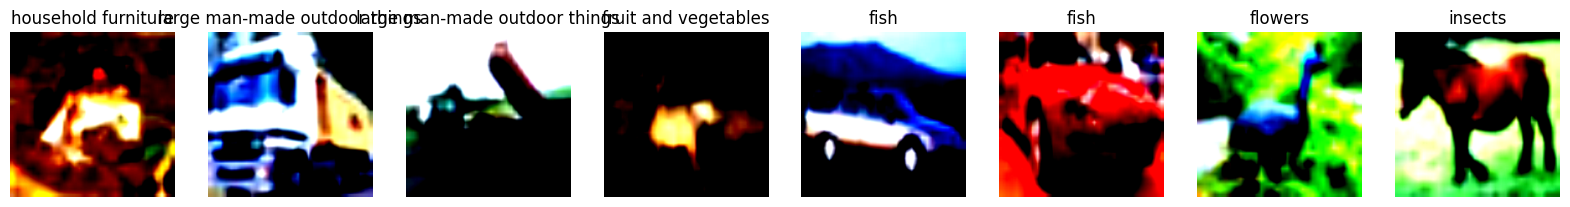

In [25]:
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

# Define transformations
transform = transforms.Compose([
    transforms.Resize(224),  # Resize the images to 224x224 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load CIFAR-10 dataset
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Define class names (update if needed to match your dataset)
classes = [
    "aquatic mammals", "fish", "flowers", "food containers", "fruit and vegetables",
    "household electrical devices", "household furniture", "insects","large carnivores",
    "large man-made outdoor things", "large natural outdoor scenes",
    "large omnivores and herbivores", "medium-sized mammals",
    "non-insect invertebrates", "people", "reptiles", "small mammals",
    "trees", "vehicles 1", "vehicles 2"
]
# Function to display images
def show_images(images, labels, class_names):
    fig, axes = plt.subplots(1, 8, figsize=(20, 3))
    for i, (img, label) in enumerate(zip(images, labels)):
        axes[i].imshow(img.permute(1, 2, 0))  # Convert from (C, H, W) to (H, W, C) for display
        axes[i].set_title(class_names[label])
        axes[i].axis('off')  # Hide axes
    plt.show()

# Extract 8 images and labels
images, labels = zip(*[dataset[i] for i in range(8)])

# Show the images with their class names
show_images(images, labels, classes)

In [26]:
# Save the trained model
model_path = 'vgg11_finetuned.pth'
torch.save(model.state_dict(), model_path)
print(f'Model saved to {model_path}')

Model saved to vgg11_finetuned.pth


In [27]:
# Reinitialize the model
model = models.vgg11(pretrained=False)  # Initialize without pre-trained weights

# Modify the final layer to match the number of classes in CIFAR-10
model.classifier[6] = nn.Linear(4096, 10)

# Load the saved state dictionary
model_path = 'vgg11_finetuned.pth'
model.load_state_dict(torch.load(model_path))

# Set the model to evaluation mode
model.eval()

print(f'Model loaded from {model_path}')

Model loaded from vgg11_finetuned.pth


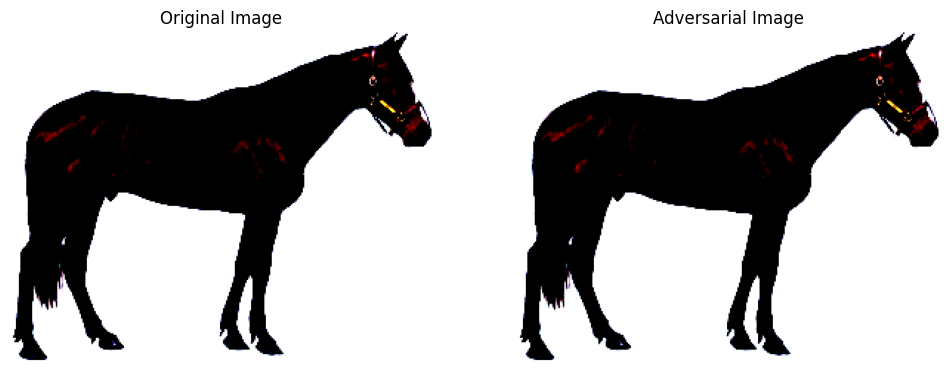

Original Prediction: horse
Adversarial Prediction: airplane


In [28]:
import requests
from PIL import Image
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import torchattacks

# Reinitialize the model
model = models.vgg11(pretrained=False)
model.classifier[6] = nn.Linear(4096, 10)  # Adjust for CIFAR-10
model.load_state_dict(torch.load('vgg11_finetuned.pth'))
model.eval()

# Define the same transformations used during training
transform = transforms.Compose([
    transforms.Resize(224),  # Resize to the input size expected by the model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def download_image(url):
    """
    Downloads an image from the given URL and returns it as a PIL Image.
    """
    response = requests.get(url)
    image = Image.open(BytesIO(response.content)).convert('RGB')
    return image

def show_image(image, title):
    """
    Displays the image using matplotlib.
    """
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()

# Direct image URL
img_url = 'https://cdn.britannica.com/96/1296-050-4A65097D/gelding-bay-coat.jpg'

# Download and preprocess the image
original_image = download_image(img_url)
original_image_tensor = transform(original_image).unsqueeze(0)  # Add batch dimension

# Move model and image to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
original_image_tensor = original_image_tensor.to(device)

# Define the SINIFGSM attack
attack_SINIFGSM = torchattacks.SINIFGSM(model, eps=8/255, alpha=2/255, steps=10, decay=1.0, m=5)

# Apply the SINIFGSM attack to the original image
original_label_tensor = torch.tensor([0])  # Placeholder label; update if needed
adv_image_tensor = attack_SINIFGSM(original_image_tensor, original_label_tensor)

# Perform predictions
with torch.no_grad():
    original_prediction = torch.argmax(model(original_image_tensor))
    adversarial_prediction = torch.argmax(model(adv_image_tensor))

# Visualize the original and adversarial images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axs[0].imshow(np.transpose(original_image_tensor.squeeze().cpu().numpy(), (1, 2, 0)))
axs[0].set_title("Original Image")
axs[0].axis('off')

# Adversarial image
axs[1].imshow(np.transpose(adv_image_tensor.squeeze().cpu().numpy(), (1, 2, 0)))
axs[1].set_title("Adversarial Image")
axs[1].axis('off')

plt.show()

# Print the original and adversarial predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Original Prediction:", class_names[original_prediction.item()])
print("Adversarial Prediction:", class_names[adversarial_prediction.item()])

The image has likely been attacked by an adversarial perturbation.


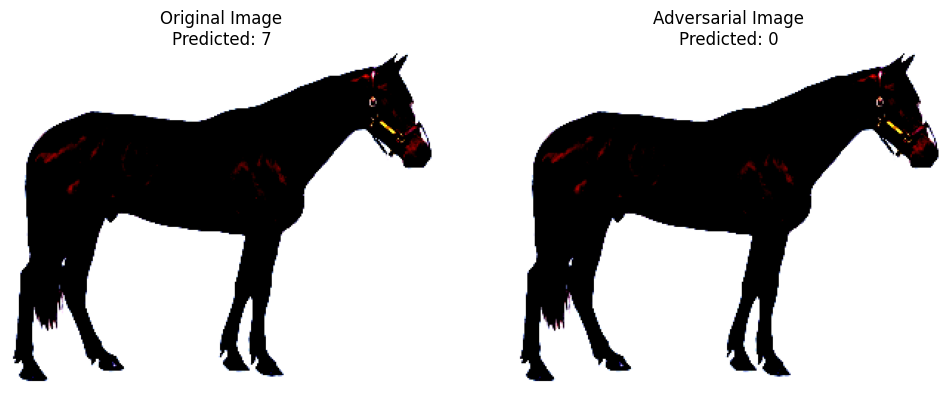

Original Prediction: 7
Adversarial Prediction: 0
Success Rate: 1.0


In [29]:
import requests
from PIL import Image
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchattacks

# Reinitialize the model
model = models.vgg11(pretrained=False)
model.classifier[6] = nn.Linear(4096, 10)  # Adjust for CIFAR-10
model.load_state_dict(torch.load('vgg11_finetuned.pth'))
model.eval()

# Define the same transformations used during training
transform = transforms.Compose([
    transforms.Resize(224),  # Resize to the input size expected by the model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def download_image(url):
    """
    Downloads an image from the given URL and returns it as a PIL Image.
    """
    response = requests.get(url)
    image = Image.open(BytesIO(response.content)).convert('RGB')
    return image

def show_image(image, title):
    """
    Displays the image using matplotlib.
    """
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()

# Direct image URL
img_url = 'https://cdn.britannica.com/96/1296-050-4A65097D/gelding-bay-coat.jpg'

# Download and preprocess the image
original_image = download_image(img_url)
original_image_tensor = transform(original_image).unsqueeze(0)  # Add batch dimension

# Perform inference on the original image
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
original_image_tensor = original_image_tensor.to(device)

with torch.no_grad():
    original_outputs = model(original_image_tensor)
    original_prediction = torch.argmax(original_outputs, 1).item()

# Define the SINIFGSM attack
attack_SINIFGSM = torchattacks.SINIFGSM(model, eps=8/255, alpha=2/255, steps=10, decay=1.0, m=5)

# Apply the SINIFGSM attack to the original image
original_label_tensor = torch.tensor([original_prediction]).to(device)
adv_image_tensor = attack_SINIFGSM(original_image_tensor, original_label_tensor)

# Predictions on original and adversarial images
with torch.no_grad():
    adversarial_outputs = model(adv_image_tensor)
    adversarial_prediction = torch.argmax(adversarial_outputs, 1).item()

# Check if the predictions differ
if original_prediction != adversarial_prediction:
    print("The image has likely been attacked by an adversarial perturbation.")
else:
    print("The image has not been attacked by an adversarial perturbation.")

# Show the original and adversarial images along with their predictions
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axs[0].imshow(np.transpose(original_image_tensor.squeeze().cpu().numpy(), (1, 2, 0)))
axs[0].set_title(f"Original Image\nPredicted: {original_prediction}")
axs[0].axis('off')

# Adversarial image
adv_image = adv_image_tensor.squeeze().cpu().detach().numpy()
axs[1].imshow(np.transpose(adv_image, (1, 2, 0)))
axs[1].set_title(f"Adversarial Image\nPredicted: {adversarial_prediction}")
axs[1].axis('off')

plt.show()

# Print the original and adversarial predictions
print("Original Prediction:", original_prediction)
print("Adversarial Prediction:", adversarial_prediction)

# Initialize variables to count successful attacks
successful_attacks = 0
total_samples = 1  # Since we are testing one sample

if original_prediction != adversarial_prediction:
    successful_attacks += 1

# Calculate the success rate
success_rate = successful_attacks / total_samples

# Print the success rate
print("Success Rate:", success_rate)

The image has likely been attacked by an adversarial perturbation.


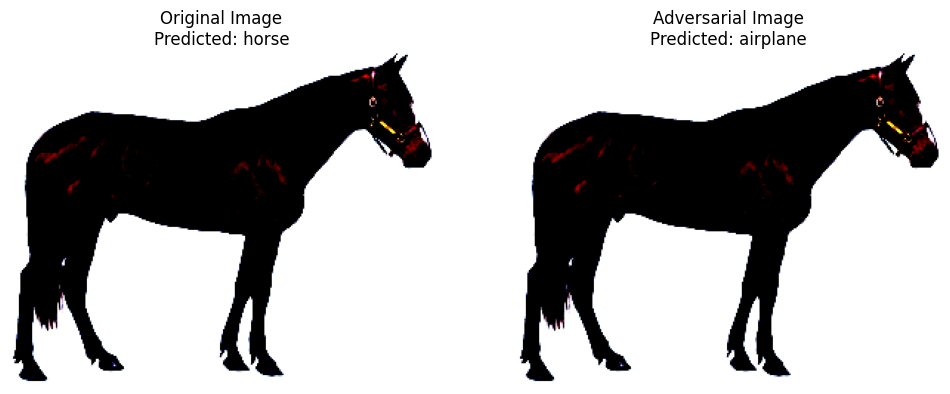

Original Prediction: horse
Adversarial Prediction: airplane
Success Rate: 1.0


In [30]:
import requests
from PIL import Image
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchattacks

# Define CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Reinitialize the model
model = models.vgg11(pretrained=False)
model.classifier[6] = nn.Linear(4096, 10)  # Adjust for CIFAR-10
model.load_state_dict(torch.load('vgg11_finetuned.pth'))
model.eval()

# Define the same transformations used during training
transform = transforms.Compose([
    transforms.Resize(224),  # Resize to the input size expected by the model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def download_image(url):
    """
    Downloads an image from the given URL and returns it as a PIL Image.
    """
    response = requests.get(url)
    image = Image.open(BytesIO(response.content)).convert('RGB')
    return image

def show_image(image, title):
    """
    Displays the image using matplotlib.
    """
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()

# Direct image URL
img_url = 'https://cdn.britannica.com/96/1296-050-4A65097D/gelding-bay-coat.jpg'

# Download and preprocess the image
original_image = download_image(img_url)
original_image_tensor = transform(original_image).unsqueeze(0)  # Add batch dimension

# Perform inference on the original image
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
original_image_tensor = original_image_tensor.to(device)

with torch.no_grad():
    original_outputs = model(original_image_tensor)
    original_prediction = torch.argmax(original_outputs, 1).item()
    original_class_label = class_names[original_prediction]

# Define the SINIFGSM attack
attack_SINIFGSM = torchattacks.SINIFGSM(model, eps=8/255, alpha=2/255, steps=10, decay=1.0, m=5)

# Apply the SINIFGSM attack to the original image
original_label_tensor = torch.tensor([original_prediction]).to(device)
adv_image_tensor = attack_SINIFGSM(original_image_tensor, original_label_tensor)

# Predictions on adversarial image
with torch.no_grad():
    adversarial_outputs = model(adv_image_tensor)
    adversarial_prediction = torch.argmax(adversarial_outputs, 1).item()
    adversarial_class_label = class_names[adversarial_prediction]

# Check if the predictions differ
attack_success = original_prediction != adversarial_prediction
if attack_success:
    print("The image has likely been attacked by an adversarial perturbation.")
else:
    print("The image has not been attacked by an adversarial perturbation.")

# Show the original and adversarial images along with their predictions
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axs[0].imshow(np.transpose(original_image_tensor.squeeze().cpu().numpy(), (1, 2, 0)))
axs[0].set_title(f"Original Image\nPredicted: {original_class_label}")
axs[0].axis('off')

# Adversarial image
adv_image = adv_image_tensor.squeeze().cpu().detach().numpy()
axs[1].imshow(np.transpose(adv_image, (1, 2, 0)))
axs[1].set_title(f"Adversarial Image\nPredicted: {adversarial_class_label}")
axs[1].axis('off')

plt.show()

# Print the original and adversarial predictions
print("Original Prediction:", original_class_label)
print("Adversarial Prediction:", adversarial_class_label)

# Initialize variables to count successful attacks
successful_attacks = 0
total_samples = 1  # Since we are testing one sample

if attack_success:
    successful_attacks += 1

# Calculate the success rate
success_rate = successful_attacks / total_samples

# Print the success rate
print("Success Rate:", success_rate)

The image has likely been attacked by an adversarial perturbation.


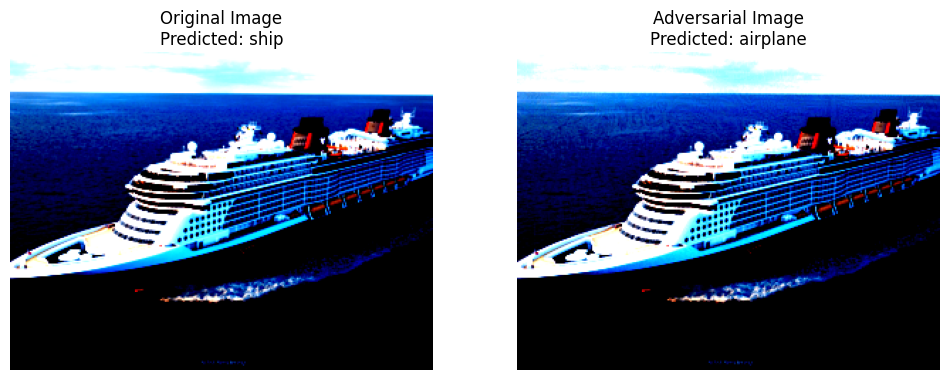

Original Prediction: ship
Adversarial Prediction: airplane
Success Rate: 1.0


In [31]:
import requests
from PIL import Image
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchattacks

# Define CIFAR-10 class names
classes = [
    "aquatic mammals", "fish", "flowers", "food containers", "fruit and vegetables",
    "household electrical devices", "household furniture", "insects","large carnivores",
    "large man-made outdoor things", "large natural outdoor scenes",
    "large omnivores and herbivores", "medium-sized mammals",
    "non-insect invertebrates", "people", "reptiles", "small mammals",
    "trees", "vehicles 1", "vehicles 2"
]

# Reinitialize the model
model = models.vgg11(pretrained=False)
model.classifier[6] = nn.Linear(4096, 10)  # Adjust for CIFAR-10
model.load_state_dict(torch.load('vgg11_finetuned.pth'))
model.eval()

# Define the same transformations used during training
transform = transforms.Compose([
    transforms.Resize(224),  # Resize to the input size expected by the model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def download_image(url):
    """
    Downloads an image from the given URL and returns it as a PIL Image.
    """
    response = requests.get(url)
    image = Image.open(BytesIO(response.content)).convert('RGB')
    return image

def show_image(image, title):
    """
    Displays the image using matplotlib.
    """
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()

# Direct image URL
img_url = 'https://media.cntraveler.com/photos/64ee0d3dfc1c4bfeb07d7276/4:3/w_2624,h_1968,c_limit/Disney%20Treasure%20-%20Exterior%202.jpg'

# Download and preprocess the image
original_image = download_image(img_url)
original_image_tensor = transform(original_image).unsqueeze(0)  # Add batch dimension

# Perform inference on the original image
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
original_image_tensor = original_image_tensor.to(device)

with torch.no_grad():
    original_outputs = model(original_image_tensor)
    original_prediction = torch.argmax(original_outputs, 1).item()
    original_class_label = class_names[original_prediction]

# Define the SINIFGSM attack
attack_SINIFGSM = torchattacks.SINIFGSM(model, eps=8/255, alpha=2/255, steps=10, decay=1.0, m=5)

# Apply the SINIFGSM attack to the original image
original_label_tensor = torch.tensor([original_prediction]).to(device)
adv_image_tensor = attack_SINIFGSM(original_image_tensor, original_label_tensor)

# Predictions on adversarial image
with torch.no_grad():
    adversarial_outputs = model(adv_image_tensor)
    adversarial_prediction = torch.argmax(adversarial_outputs, 1).item()
    adversarial_class_label = class_names[adversarial_prediction]

# Check if the predictions differ
attack_success = original_prediction != adversarial_prediction
if attack_success:
    print("The image has likely been attacked by an adversarial perturbation.")
else:
    print("The image has not been attacked by an adversarial perturbation.")

# Show the original and adversarial images along with their predictions
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axs[0].imshow(np.transpose(original_image_tensor.squeeze().cpu().numpy(), (1, 2, 0)))
axs[0].set_title(f"Original Image\nPredicted: {original_class_label}")
axs[0].axis('off')

# Adversarial image
adv_image = adv_image_tensor.squeeze().cpu().detach().numpy()
axs[1].imshow(np.transpose(adv_image, (1, 2, 0)))
axs[1].set_title(f"Adversarial Image\nPredicted: {adversarial_class_label}")
axs[1].axis('off')

plt.show()

# Print the original and adversarial predictions
print("Original Prediction:", original_class_label)
print("Adversarial Prediction:", adversarial_class_label)

# Initialize variables to count successful attacks
successful_attacks = 0
total_samples = 1  # Since we are testing one sample

if attack_success:
    successful_attacks += 1

# Calculate the success rate
success_rate = successful_attacks / total_samples

# Print the success rate
print("Success Rate:", success_rate)

In [32]:
# Load pre-trained model
model = models.vgg11(pretrained=False)
model.classifier[6] = nn.Linear(4096, 10)  # Adjust for CIFAR-10
model.load_state_dict(torch.load('vgg11_finetuned.pth'))
model.eval()



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define attacks
attacks = {
    'VANILA': torchattacks.VANILA(model),
    'GN': torchattacks.GN(model),
    'FGSM': torchattacks.FGSM(model, eps=8/255),
    'BIM': torchattacks.BIM(model, eps=8/255, alpha=2/255, steps=10),
    'RFGSM': torchattacks.RFGSM(model, eps=8/255, alpha=2/255, steps=10)
}

# Initialize variables to count successful attacks
successful_attacks = {attack_name: 0 for attack_name in attacks.keys()}
total_samples = 0

# Iterate over the test dataset
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    total_samples += labels.size(0)

    # Apply the attacks
    adversarial_images = {name: attack(images, labels) for name, attack in attacks.items()}

    # Predictions on original and adversarial images
    with torch.no_grad():
        original_predictions = torch.argmax(model(images), dim=1)
        adversarial_predictions = {name: torch.argmax(model(adv_images), dim=1) for name, adv_images in adversarial_images.items()}

    # Check if the predictions differ for each attack
    for name, adv_predictions in adversarial_predictions.items():
        successful_attacks[name] += (original_predictions != adv_predictions).sum().item()

# Calculate the success rate for each attack
success_rates = {name: count / total_samples for name, count in successful_attacks.items()}

# Print the success rates for each attack
for name, rate in success_rates.items():
    print(f"{name} Success Rate: {rate:.4f}")

# Compare which attack has the highest success rate
highest_success_rate = max(success_rates.values())
best_attack = [name for name, rate in success_rates.items() if rate == highest_success_rate]

print(f"{', '.join(best_attack)} has the highest success rate.")


VANILA Success Rate: 0.0000
GN Success Rate: 0.6888
FGSM Success Rate: 0.7477
BIM Success Rate: 0.8998
RFGSM Success Rate: 0.9711
RFGSM has the highest success rate.
